
Masked wordcloud Examples
================
Inspired by a facebook analysis of words used by family members to talk to each other.  Facebook found differences in words used by son/daughter to talk to father for example. Full story can be found here:
 - https://www.facebook.com/notes/facebook-data-science/how-families-interact-on-facebook/10151208188528859/

Information on how to create masked wordclouds according to arbitrary shapes can be found here:<br>
 - https://github.com/amueller/word_cloud/blob/master/examples/colored_by_group.py<br>
 - https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html<br>
 - https://github.com/amueller/word_cloud/pull/73<br>
 - https://github.com/amueller/word_cloud<br>
 
 NOTE: The masks need to be 8-bit grey scale images<br>

In [110]:
%matplotlib inline
alice_path = '/Users/loubellaire/Documents/_SMG/Epic_Planning/DataScience/DataViz/WordClouds/word_cloud-master/examples/'
globe_path = '/Users/loubellaire/Documents/_SMG/Epic_Planning/DataScience/DataViz/WordClouds/Globe/'
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, get_single_color_func

In [13]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.
       Uses wordcloud.get_single_color_func
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

# Original Online Example: Alice from Alice in Wonderland
Here we use the outline of Alice and text from Alice in Wonderland to make our example
- https://github.com/amueller/word_cloud/tree/master/examples

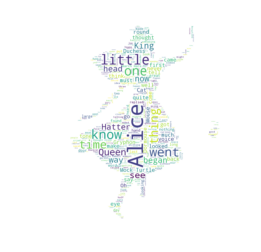

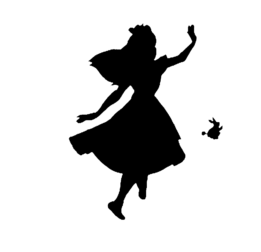

In [14]:
d_path = path.dirname(alice_path)
w_path = path.dirname(alice_path)

# Read the whole text.
text = open(path.join(d_path, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d_path, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d_path, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

Venn-Diagram-Masked wordcloud  (2-Class)
================

New Mask created using Adobe Illustrator <br>
/Users/loubellaire/Documents/_SMG/Epic_Planning/DataScience/DataViz/WordClouds/Venn_2/
 -  CenterBubble_mask.png
 -  LeftBubble_mask.png
 -  RightBubble_mask.png
 
# Simple Custom Colors have added to the words
 - see for example: http://imgur.com/a/iY0YK

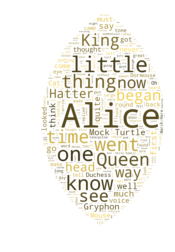

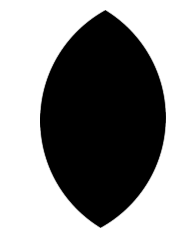

In [23]:
venn_path = '/Users/loubellaire/Documents/_SMG/Epic_Planning/DataScience/DataViz/WordClouds/Venn_2/'
d_path = path.dirname(venn_path)

# Read the whole text.
text = open(path.join(w_path, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
centerbubble_mask = np.array(Image.open(path.join(d_path, "CenterBubble_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=centerbubble_mask,
               stopwords=stopwords, margin=10).generate(text)

default_color = '#FFDB58'
color_to_words ={}
# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(centerbubble_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
wc.to_file(path.join(d_path, "CenterBubble.png"))

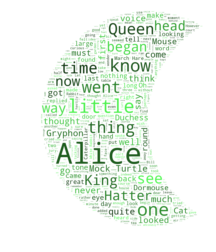

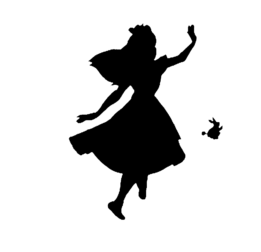

In [70]:
d_path = path.dirname(venn_path)

# Read the whole text.
text = open(path.join(w_path, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
leftbubble_mask = np.array(Image.open(path.join(d_path, "LeftBubble_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=leftbubble_mask,
               stopwords=stopwords, margin=10).generate(text)
default_color = '#3EC03F'
color_to_words ={}
# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wc.to_file(path.join(d_path, "LeftBubble.png"))

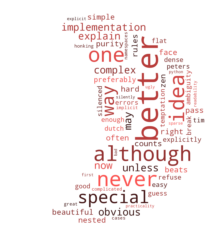

In [42]:
# NOW MAKE THE LEFT BALLON USING Different Text
#
text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""


d_path = path.dirname(venn_path)
# Since the text is small collocations are turned off and text is lower-cased

rightbubble_mask = np.array(Image.open(path.join(d_path, "RightBubble_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words = 2000, mask = rightbubble_mask,
               stopwords=stopwords, margin=10).generate(text.lower())

color_to_words ={}
#color_to_words = {
#    # words below will be colored with a green single color function
#    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
#                'readability', 'rules', 'practicality',
#                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
#    # will be colored with a red single color function
#    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
#            'dense', 'special', 'errors', 'silently', 'ambiguity',
#            'guess', 'hard'],
#}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = '#BE3F3D'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.to_file("right_bubble.png")

# More Complex Colors can be added to the words
 - see for example: http://imgur.com/a/iY0YK

In [21]:
d_path = path.dirname(venn_path)

# Read the whole text.
text = open(path.join(w_path, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d_path, "RightBubble_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, margin=10).generate(text)


# store default colored image
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("rightmask.png")
plt.savefig("output1.svg")
plt.axis("off")
plt.figure()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'venn_path' is not defined

3-Class Venn-Diagram-Masked wordcloud
================

New Mask created using Adobe Illustrator <br>
Ryan House had a .svg for the 3-class Venn Diagram
/Users/loubellaire/Documents/_SMG/Epic_Planning/DataScience/DataViz/WordClouds/Venn_3/
 -  Venn3_outright.png, Venn3_outleft.png, Venn3_outmid.png
 -  Venn3_midright.png, Venn3_midleft.png, Venn3_midbottom.png
 -  Venn3_middle.png
 
# Simple Custom Colors have added to the words
 - see for example: http://imgur.com/a/iY0YK

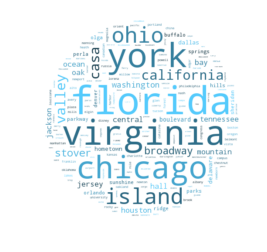

In [122]:
d_path = path.dirname(globe_path)

# Read the keyword frequency text.
df = pd.read_csv(path.join(d_path, "place_freq.csv"),  index_col=0)
mydict = {comment:freq for comment, freq in zip(df.comment, df.freq)}

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#globe_mask = np.array(Image.open(path.join(d_path, "Globe_grey.png")))

image_file = Image.open(path.join(d_path, "Globe_500x500.png"))
im2 = image_file.convert('P', palette=Image.ADAPTIVE)
globe_mask = np.array(im2)

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords, margin=10).generate_from_frequencies(mydict)

color_to_words ={}
default_color = '#43a2ca'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.to_file(path.join(d_path, "globe_out.png"))
plt.savefig(path.join(d_path,"globe_out.svg"))

plt.savefig('globe_out.eps', format='eps', dpi=1000)
plt.savefig('globe_out.pdf', format='pdf')

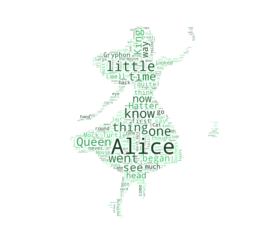

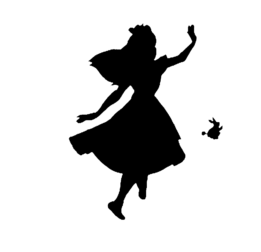

In [108]:
w_path = path.dirname(alice_path)

# Read the whole text.
text = open(path.join(w_path, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(w_path, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords).generate(text)

color_to_words ={}
default_color = '#31a354'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file(path.join(d_path, "alice_out.png"))
plt.savefig(path.join(d_path, "alice_out.svg"))